In [12]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from walking_home.walk import step

def run_experiment(n_runs: int, p_pentagon: float, p_kaia: float, seed: int = 1310):
    random.seed(seed)
    outcomes = []
    steps = []
    times = []

    for _ in range(n_runs):
        dest, n_steps, t_seconds = step(
            p_pentagon=p_pentagon,
            p_kaia=p_kaia,
        )
        outcomes.append(dest)
        steps.append(n_steps)
        times.append(t_seconds)

    prob_kaia = outcomes.count("Kaia") / n_runs
    prob_pentagon = outcomes.count("Pentagon") / n_runs

    return {
        "p_pentagon": p_pentagon,
        "p_kaia": p_kaia,
        "prob_kaia": prob_kaia,
        "prob_pentagon": prob_pentagon,
        "mean_steps": np.mean(steps),
        "mean_time_s": np.mean(times),
    }




In [13]:
p_values = np.linspace(0.1, 0.9, 9)
results = []

for p_p in p_values:
    for p_k in p_values:
        results.append(run_experiment(1000, p_p, p_k))

df = pd.DataFrame(results)
df.head()


,p_pentagon,p_kaia,prob_kaia,prob_pentagon,mean_steps,mean_time_s
0,0.1,0.1,0.497,0.503,1003.269,5016.995
1,0.1,0.2,0.504,0.496,976.508,4882.557
2,0.1,0.3,0.505,0.495,963.874,4818.951
3,0.1,0.4,0.505,0.495,961.535,4807.383
4,0.1,0.5,0.505,0.495,949.969,4749.302


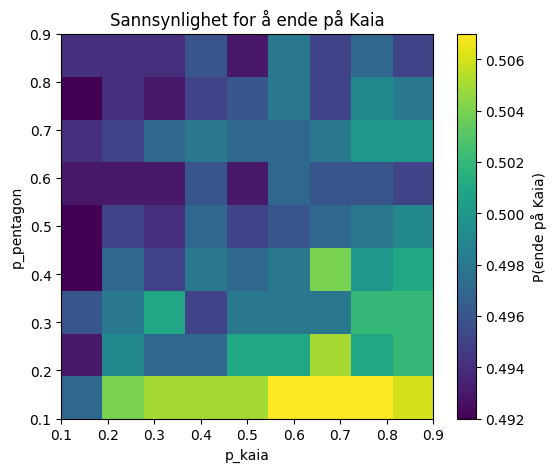

In [14]:
pivot_prob_kaia = df.pivot(index="p_pentagon", columns="p_kaia", values="prob_kaia")

plt.figure(figsize=(6, 5))
im = plt.imshow(
    pivot_prob_kaia.values,
    origin="lower",
    extent=[p_values.min(), p_values.max(), p_values.min(), p_values.max()],
    aspect="auto",
)
plt.colorbar(im, label="P(ende på Kaia)")
plt.xlabel("p_kaia")
plt.ylabel("p_pentagon")
plt.title("Sannsynlighet for å ende på Kaia")
plt.show()


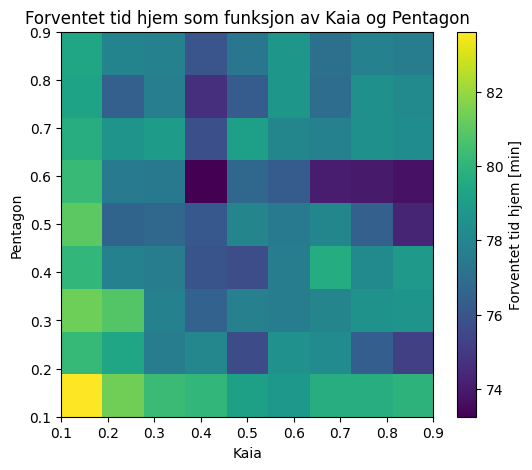

In [15]:

pivot_mean_time = df.pivot(index="p_pentagon", columns="p_kaia", values="mean_time_s")

plt.figure(figsize=(6, 5))
im = plt.imshow(
    pivot_mean_time.values / 60.0,
    origin="lower",
    extent=[p_values.min(), p_values.max(), p_values.min(), p_values.max()],
    aspect="auto",
)
plt.colorbar(im, label="Forventet tid hjem [min]")
plt.xlabel("Kaia")
plt.ylabel("Pentagon")
plt.title("Forventet tid hjem som funksjon av Kaia og Pentagon")
plt.show()
